In [1]:
import numpy as np
import pandas as pd
import toolz as tz
import itertools as it
import functools as ft

import rospy
from rosh import Bagy


from robot_wardrive.msg import SignalLocation

# Load Data

In [2]:
ls patrolling_2015-06-08/

2015-06-08-10-52_google.bagy  2015-06-08-10-52_signal_location.bagy
2015-06-08-10-52_google.csv   2015-06-08-15-42_google.bagy
2015-06-08-10-52_mpc.bagy     2015-06-08-15-42_mpc.bagy
2015-06-08-10-52_mpc.csv


In [3]:
msgs = None
columns=['x', 'y', 'link', 'level', 'noise']
# bagy_name = '2015-05-28_signal_location_trunkated.bagy'
bagy_name = '2015-05-28_signal_location.bagy'
with Bagy(bagy_name, 'r', SignalLocation) as bagy:
    msgs = pd.DataFrame([(msg.pose.position.x, msg.pose.position.y, msg.link, msg.level, msg.noise) for msg in bagy], columns=columns)
    

        
        
        

In [4]:
msgs.head()

,x,y,link,level,noise
0,11.803684,86.801627,44,-66,-256
1,11.807398,86.842084,44,-66,-256
2,11.802938,87.034106,47,-63,-256
3,11.790895,87.047752,47,-63,-256
4,11.797792,87.251747,46,-64,-256


In [5]:
msgs.describe()

,x,y,link,level,noise
count,5801.000000,5801.000000,5801.000000,5801.000000,5801.000000
mean,12.271759,62.765342,48.435615,-40.107740,-225.594208
std,1.076137,27.336545,23.603894,28.129533,82.828457
min,7.945095,4.703987,0.000000,-87.000000,-256.000000
25%,11.861756,39.231444,33.000000,-70.000000,-256.000000
50%,11.982055,62.085303,51.000000,-23.000000,-256.000000
75%,12.174500,87.081846,70.000000,-20.000000,-256.000000
max,18.140359,109.040471,70.000000,0.000000,0.000000


# Plots

#Rounding 

Rounding messages to a meter resolution and geting median link or each square meter.

In [80]:
rounded = msgs.apply(np.round, decimals=0)
rounded = rounded.groupby(['x', 'y']).median().reset_index(inplace=False)
#rounded['link'] = rounded['link'] * -1
rounded.head()

,x,y,link,level,noise
0,8,17,70,-19.5,-256
1,8,18,24,-86.0,-256
2,9,16,70,-20.0,-256
3,9,17,70,-20.0,-256
4,9,18,24,-86.0,-256


## Plot rounded

In [81]:
# Set image limits
extent=[min(rounded.x - 6.55), max(rounded.x + 5.55),
       min(rounded.y - 4.6),max(rounded.y + 11.4)]

In [82]:
%pylab qt

Populating the interactive namespace from numpy and matplotlib


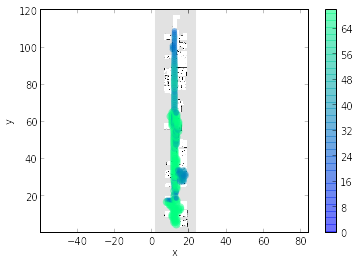

In [83]:
rounded.plot(kind='scatter', x='x', y='y', c='link',
             s=rounded.link, linewidth=0, alpha=0.5,
             grid=None, cmap="winter")  # cmap=*_r is reversed version of the cmap
img = plt.imread('roboticslab_complete_clean.png')
implot = plt.imshow(img, extent=extent, cmap='Greys_r')
axes().set_aspect('equal', 'datalim')
plt.grid(b=None)
#plt.savefig('wifi_coverage.pdf', grid=None, transparent=False, dpi=300)

# SaveFig

In [84]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


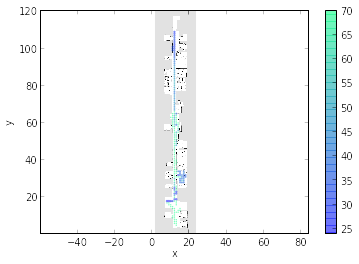

In [85]:
rounded.plot(kind='scatter', x='x', y='y', c='link',
             s=2*70/rounded.link, linewidth=0, alpha=0.5,
             grid=None, cmap="winter")  # cmap=*_r is reversed version of the cmap
img = plt.imread('roboticslab_complete_clean.png')
implot = plt.imshow(img, extent=extent, cmap='Greys_r')
axes().set_aspect('equal', 'datalim')
plt.grid(b=None)
plt.savefig('wifi_coverage.pdf', grid=None, transparent=False, dpi=300)